In [298]:
import pandas as pd
df= pd.read_csv('../data/Clean_Dataset.csv', index_col=0)

In [299]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


![](../../imgs/featureEngin.png)

In [300]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [301]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [302]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [303]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [304]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [305]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [306]:
df["class"].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [307]:
# describe the  of  duration of the flights

df.duration.describe().T[["min", "max", "mean"]]

min      0.830000
max     49.830000
mean    12.221021
Name: duration, dtype: float64

In [308]:
# prepross dataframe 
df.drop(["flight"], axis=1, inplace=True)

In [309]:
# binary encoding 
df["class"]= df["class"].apply(lambda x: 1 if x=="Economy" else 0)

In [310]:
# encode "stops" features 
df["stops"].unique()
# df["stops"]= df["stops"].apply(lambda x: 0 if x=="non-stop" else 1
pd.factorize(df["stops"])

(array([0, 0, 0, ..., 1, 1, 1]),
 Index(['zero', 'one', 'two_or_more'], dtype='object'))

In [311]:
df.stops = pd.factorize(df["stops"])[0]

In [312]:
df.sample(5, random_state=46)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
20645,Indigo,Delhi,Afternoon,0,Evening,Kolkata,1,2.17,5,5955
223085,Vistara,Delhi,Evening,1,Evening,Chennai,0,24.08,20,65832
55212,Air_India,Mumbai,Evening,2,Afternoon,Bangalore,1,17.92,15,14810
254217,Vistara,Bangalore,Morning,1,Evening,Kolkata,0,8.33,23,60508
246983,Vistara,Bangalore,Evening,1,Late_Night,Delhi,0,6.50,29,42521


In [314]:
# onrhot encpding  of airine  feature of  our datsset 
pd.get_dummies(df, columns=["airline"], drop_first=True, prefix="AirL", dtype=int).head()

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,AirL_Air_India,AirL_GO_FIRST,AirL_Indigo,AirL_SpiceJet,AirL_Vistara
0,Delhi,Evening,0,Night,Mumbai,1,2.17,1,5953,0,0,0,1,0
1,Delhi,Early_Morning,0,Morning,Mumbai,1,2.33,1,5953,0,0,0,1,0
2,Delhi,Early_Morning,0,Early_Morning,Mumbai,1,2.17,1,5956,0,0,0,0,0
3,Delhi,Morning,0,Afternoon,Mumbai,1,2.25,1,5955,0,0,0,0,1
4,Delhi,Morning,0,Morning,Mumbai,1,2.33,1,5955,0,0,0,0,1


In [315]:
cat_features = df.select_dtypes(include="object").columns
cat_features

Index(['airline', 'source_city', 'departure_time', 'arrival_time',
       'destination_city'],
      dtype='object')

In [316]:
# onehot encode all object type features
# diaplay all features columns  ( max columns)
pd.set_option('display.max_columns', None)

pd.get_dummies(df, columns=cat_features, drop_first=True, prefix=cat_features, dtype=int).head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,1,2.17,1,5953,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,1,2.33,1,5953,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,1,2.17,1,5956,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,1,2.25,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,1,2.33,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [317]:
# we can proceed more  by onehot encoding all categorical features of our dataset

df= pd.get_dummies(df, drop_first=True ,  dtype=int)
df.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,1,2.17,1,5953,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,1,2.33,1,5953,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,1,2.17,1,5956,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,1,2.25,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,1,2.33,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


![](../../imgs/model.png)

## LinearRegression

![](../../imgs/dataSplit.jpg)

In [318]:
X= df.drop("price", axis=1)
y= df.price

In [320]:
# import a randomforest regressor from sklearn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=46)

In [321]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((240122, 29), (240122,), (60031, 29), (60031,))

In [322]:
reg= RandomForestRegressor(n_estimators=50, random_state=46, n_jobs=-1)
reg.fit(X_train, y_train)


RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=46)

![](../../imgs/metrics.png)

In [323]:
# print main  metrics  score of the model
reg.score(X_test, y_test)

0.9848884643889171

In [324]:

# import R2 , mean_squared_error  and mean absolute error from sklearn.metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math
y_pred=reg.predict(X_test)
print(f"    R2   {r2_score(y_test, y_pred):.3f}")
print(f"    Mean Squared Error MSE :  {mean_squared_error(y_test, y_pred):.3f}")
print(f"    MAE  :  {mean_absolute_error(y_test, y_pred):.3f}")
print(f"    RMSE  :  {math.sqrt(mean_squared_error(y_test, y_pred)):.3f}")


    R2   0.985
    Mean Squared Error MSE :  7821105.878
    MAE  :  1087.234
    RMSE  :  2796.624


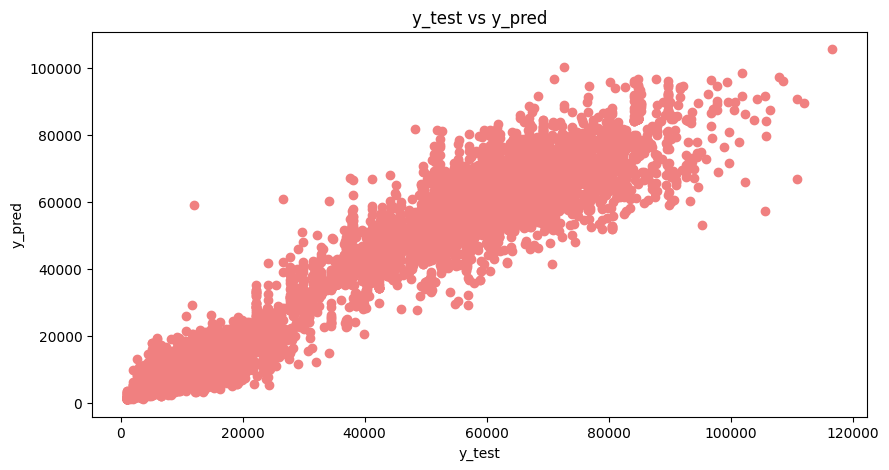

In [327]:
# plot  y_test vs y_pred
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, c="lightcoral")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("y_test vs y_pred")
plt.show()

In [330]:
df.price.describe().T# describe the price of the flights

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

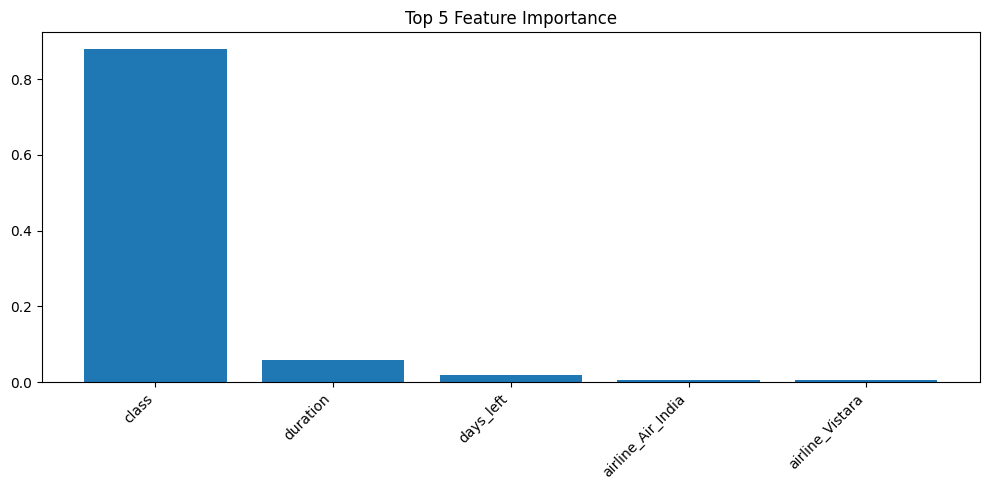

In [343]:
# display most important 5 features of the model

import numpy as np
importances = reg.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]
plt.figure(figsize=(10, 5))
plt.title("Top 5 Feature Importance")
plt.bar(range(5), importances[indices[:5]])
plt.xticks(range(5), names[:5], rotation=45, ha="right") # Rotate labels for better readability
plt.tight_layout()
plt.show()


# GridSearch 

In [344]:
# proceed through gridseachcv
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200], # The number of trees in the forest
    'max_features': ['auto', 'sqrt'], # The number of features to consider when looking for the best split
    'max_depth': [None, 10, 20, 30,], # The maximum depth of the tree
    'min_samples_split': [2, 5, 10], # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] # The minimum number of samples required to be at a leaf node
}

grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


: 

In [ ]:
# best param
grid_search.best_params_

## RandomizeGridSearch 

In [ ]:
# import randomizeserachcv 
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200], # The number of trees in the forest
    'max_features': ['auto', 'sqrt'], # The number of features to consider when looking for the best split
    'max_depth': [None, 10, 20, 30,], # The maximum depth of the tree
    'min_samples_split': [2, 5, 10], # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] # The minimum number of samples required to be at a leaf node
}

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)
